In [1]:
import matplotlib.pyplot as plt
import numpy as np
from keras.callbacks import CSVLogger, ModelCheckpoint, TensorBoard
from keras.layers import Conv2D, Dense, Dropout, Flatten, MaxPooling2D
from keras.models import Sequential
from keras.optimizers.legacy import SGD
from keras.utils import image_dataset_from_directory

In [2]:
class_names = ["MildDemented", "ModerateDemented", "NonDemented", "VeryMildDemented"]

In [3]:
train_ds = image_dataset_from_directory(
    directory="../alzheimers_dataset/train/",
    labels="inferred",
    label_mode="categorical",
    class_names=class_names,
    color_mode="grayscale",
    batch_size=64,
    image_size=(200, 200),
    seed=42,
    validation_split=0.2,
    subset="training",
)

val_ds = image_dataset_from_directory(
    directory="../alzheimers_dataset/train/",
    labels="inferred",
    label_mode="categorical",
    class_names=class_names,
    color_mode="grayscale",
    batch_size=64,
    image_size=(200, 200),
    seed=42,
    validation_split=0.2,
    subset="validation",
)

test_ds = image_dataset_from_directory(
    directory="../alzheimers_dataset/test/",
    labels="inferred",
    label_mode="categorical",
    class_names=class_names,
    color_mode="grayscale",
    batch_size=64,
    image_size=(200, 200),
    seed=42,
)

Found 5121 files belonging to 4 classes.
Using 4097 files for training.


2023-08-07 11:12:04.385374: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2023-08-07 11:12:04.385409: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2023-08-07 11:12:04.385508: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2023-08-07 11:12:04.385637: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-08-07 11:12:04.385744: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Found 5121 files belonging to 4 classes.
Using 1024 files for validation.
Found 1279 files belonging to 4 classes.


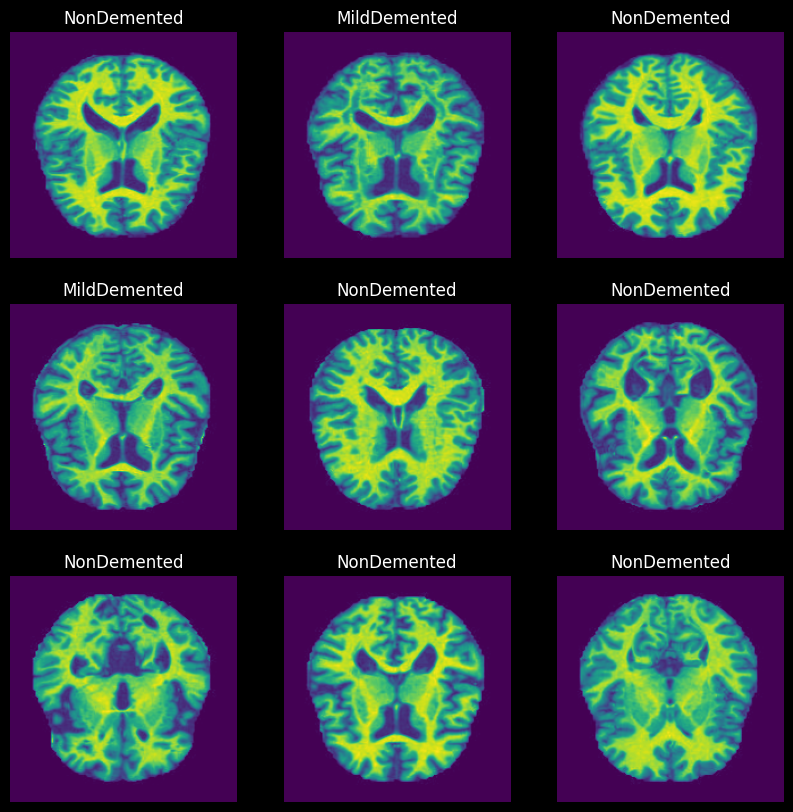

In [4]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[np.argmax(labels[i])])
        plt.axis("off")

In [5]:
input_shape = (200, 200, 1)
alzheimers = Sequential(
    layers=[
        Conv2D(
            filters=32,
            kernel_size=(3, 3),
            activation="relu",
            padding="same",
            input_shape=input_shape,
            name="conv_layer_1",
        ),
        MaxPooling2D((2, 2), name="pooling_layer_1"),
        Dropout(0.2, name="dropout_layer_1"),
        Flatten(name="flatten_layer"),
        Dense(32, activation="relu", name="dense_layer_1"),
        Dense(4, activation="softmax", name="final_layer"),
    ],
    name="alzheimers_cnn",
)

In [6]:
alzheimers.layers

In [7]:
alzheimers.summary()

Model: "alzheimers_cnn"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_layer_1 (Conv2D)       (None, 200, 200, 32)      320       
                                                                 
 pooling_layer_1 (MaxPoolin  (None, 100, 100, 32)      0         
 g2D)                                                            
                                                                 
 dropout_layer_1 (Dropout)   (None, 100, 100, 32)      0         
                                                                 
 flatten_layer (Flatten)     (None, 320000)            0         
                                                                 
 dense_layer_1 (Dense)       (None, 32)                10240032  
                                                                 
 final_layer (Dense)         (None, 4)                 132       
                                                    

In [8]:
optimizer = SGD(learning_rate=0.001, momentum=0.9)
epochs = 10
alzheimers.compile(
    optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"]
)

In [9]:
alzheimers_checkpoint_callback = ModelCheckpoint(
    filepath="../Models/alzheimers_cnn",
    monitor="val_accuracy",
    save_best_only=True,
)
alzheimers_tensorboard_callback = TensorBoard(
    log_dir="../Logs/alzheimers_cnn_logs", histogram_freq=1, write_images=True
)
alzheimers_csvlogger_callback = CSVLogger("../Logs/alzheimers_cnn_logs.csv")
alzheimers_history = alzheimers.fit(
    train_ds,
    batch_size=64,
    epochs=epochs,
    validation_data=val_ds,
    callbacks=[
        alzheimers_checkpoint_callback,
        alzheimers_tensorboard_callback,
        alzheimers_csvlogger_callback,
    ],
)

Epoch 1/10


2023-08-07 11:12:06.369140: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


65/65 [==============================] - ETA: 0s - loss: 73831.8359 - accuracy: 0.3620

2023-08-07 11:12:23.842688: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


INFO:tensorflow:Assets written to: ../Models/alzheimers_cnn/assets


INFO:tensorflow:Assets written to: ../Models/alzheimers_cnn/assets


65/65 [==============================] - 21s 309ms/step - loss: 73831.8359 - accuracy: 0.3620 - val_loss: 54.7882 - val_accuracy: 0.1191
Epoch 2/10
65/65 [==============================] - ETA: 0s - loss: 15.8482 - accuracy: 0.2761INFO:tensorflow:Assets written to: ../Models/alzheimers_cnn/assets


INFO:tensorflow:Assets written to: ../Models/alzheimers_cnn/assets


65/65 [==============================] - 18s 276ms/step - loss: 15.8482 - accuracy: 0.2761 - val_loss: 1.4596 - val_accuracy: 0.5195
Epoch 3/10
65/65 [==============================] - 18s 272ms/step - loss: 3.2692 - accuracy: 0.4335 - val_loss: 1.0970 - val_accuracy: 0.3516
Epoch 4/10
65/65 [==============================] - 16s 246ms/step - loss: 3.8501 - accuracy: 0.4105 - val_loss: 4.6764 - val_accuracy: 0.5195
Epoch 5/10
65/65 [==============================] - 16s 243ms/step - loss: 3.6525 - accuracy: 0.4213 - val_loss: 1.2726 - val_accuracy: 0.1191
Epoch 6/10
65/65 [==============================] - 16s 240ms/step - loss: 2.2486 - accuracy: 0.4281 - val_loss: 8.9142 - val_accuracy: 0.3516
Epoch 7/10
65/65 [==============================] - 16s 242ms/step - loss: 2.9305 - accuracy: 0.4127 - val_loss: 3.9855 - val_accuracy: 0.3516
Epoch 8/10
65/65 [==============================] - 16s 242ms/step - loss: 2.5367 - accuracy: 0.4096 - val_loss: 2.6079 - val_accuracy: 0.5195
Epoch 9/1

In [10]:
alzheimers_train_loss = alzheimers_history.history["loss"]
alzheimers_train_acc = alzheimers_history.history["accuracy"]
alzheimers_val_acc = alzheimers_history.history["val_accuracy"]
alzheimers_val_loss = alzheimers_history.history["val_loss"]

print("Training loss:", np.mean(alzheimers_train_loss))
print("Validation loss:", np.mean(alzheimers_val_loss))
print(
    "%f Training accuracy with a standard deviation of %f"
    % (np.mean(alzheimers_train_acc), np.std(alzheimers_train_acc))
)
print(
    "%f Validation accuracy with a standard deviation of %f"
    % (np.mean(alzheimers_val_acc), np.std(alzheimers_val_acc))
)

Training loss: 7387.200616669655
Validation loss: 9.202844500541687
0.403710 Training accuracy with a standard deviation of 0.048050
0.389062 Validation accuracy with a standard deviation of 0.153312


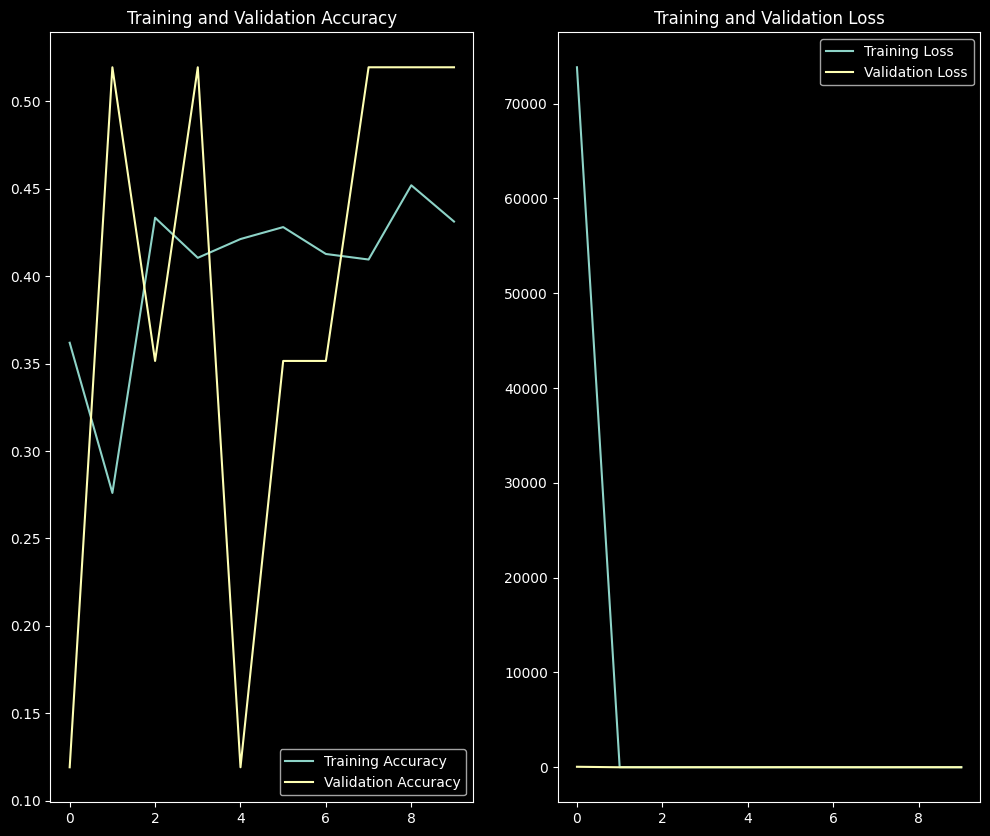

In [11]:
epochs_range = range(epochs)

# Plot the training and validation accuracy
plt.figure(figsize=(12, 10))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, alzheimers_train_acc, label="Training Accuracy")
plt.plot(epochs_range, alzheimers_val_acc, label="Validation Accuracy")
plt.legend(loc="best")
plt.title("Training and Validation Accuracy")

# Plot the training and validation loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, alzheimers_train_loss, label="Training Loss")
plt.plot(epochs_range, alzheimers_val_loss, label="Validation Loss")
plt.legend(loc="best")
plt.title("Training and Validation Loss")

plt.savefig("../Images/alzheimers_acc_loss.png", bbox_inches="tight")

In [12]:
alzheimers_test_loss, alzheimers_test_accuracy = alzheimers.evaluate(test_ds)
print("Test loss:", alzheimers_test_loss)
print("Test accuracy:", alzheimers_test_accuracy)

20/20 [==============================] - 1s 51ms/step - loss: 6.1995 - accuracy: 0.5004
Test loss: 6.199520111083984
Test accuracy: 0.5003909468650818


In [13]:
y_pred = alzheimers.predict(test_ds)

 2/20 [==>...........................] - ETA: 0s

2023-08-07 11:14:57.530440: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


20/20 [==============================] - 1s 54ms/step
